In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
import string
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, precision_score, recall_score, accuracy_score
data = pd.read_csv("C:/Users/Student/Desktop/gopal/Corona_NLP_test.csv",encoding='latin1')
data




,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral
...,...,...
3793,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,Did you panic buy a lot of non-perishable item...,Negative
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,Gov need to do somethings instead of biar je r...,Extremely Negative


In [3]:
file = open("C:/Users/Student/Desktop/gopal/Sample.txt",encoding='latin1')
data_2 = file.read()
data_2



"Attack on Titan (Japanese: é\x80²æ\x92\x83ã\x81®å·¨äºº, Hepburn: Shingeki no Kyojin; lit.â\x80\x89'The Advancing Giant(s)') is a Japanese dark fantasy anime television series. It is an adaptation of Hajime Isayama's 2009â\x80\x932021 manga series Attack on Titan. The series premiered on April 7, 2013, and concluded on November 5, 2023. Animated by Wit Studio (first three seasons) and MAPPA (final season), the series aired on Mainichi Broadcasting System (first two seasons) and NHK General TV (third season onwards). In North America, the series has been streamed on Crunchyroll, Funimation, and Hulu. Attack on Titan has also aired on Adult Swim's Toonami programming block in the United States."

In [4]:
import requests
import pandas as pd

# URL of the raw CSV file
url = "https://raw.githubusercontent.com/omaarelsherif/Movie-Reviews-Sentiment-Analysis-Using-Machine-Learning/main/Dataset/IMDB.csv"

# Fetch the content from the URL
response = requests.get(url)
response.raise_for_status()  # Check if the request was successful

# Save the content to a CSV file
csv_file_path = "C:/Users/Student/dharsh/pritheev/Book1.csv"
with open(csv_file_path, 'wb') as file:
    file.write(response.content)

print(f"Data has been saved to {csv_file_path}")

Data has been saved to C:/Users/Student/dharsh/pritheev/Book1.csv


In [5]:
import nltk
sentences = nltk.sent_tokenize(data_2)
sentences


["Attack on Titan (Japanese: é\x80²æ\x92\x83ã\x81®å·¨äºº, Hepburn: Shingeki no Kyojin; lit.â\x80\x89'The Advancing Giant(s)') is a Japanese dark fantasy anime television series.",
 "It is an adaptation of Hajime Isayama's 2009â\x80\x932021 manga series Attack on Titan.",
 'The series premiered on April 7, 2013, and concluded on November 5, 2023.',
 'Animated by Wit Studio (first three seasons) and MAPPA (final season), the series aired on Mainichi Broadcasting System (first two seasons) and NHK General TV (third season onwards).',
 'In North America, the series has been streamed on Crunchyroll, Funimation, and Hulu.',
 "Attack on Titan has also aired on Adult Swim's Toonami programming block in the United States."]

In [6]:
len(sentences)


6

In [7]:
tokens = nltk.word_tokenize(data_2)
tokens

['Attack',
 'on',
 'Titan',
 '(',
 'Japanese',
 ':',
 'é\x80²æ\x92\x83ã\x81®å·¨äºº',
 ',',
 'Hepburn',
 ':',
 'Shingeki',
 'no',
 'Kyojin',
 ';',
 "lit.â\x80\x89'The",
 'Advancing',
 'Giant',
 '(',
 's',
 ')',
 "'",
 ')',
 'is',
 'a',
 'Japanese',
 'dark',
 'fantasy',
 'anime',
 'television',
 'series',
 '.',
 'It',
 'is',
 'an',
 'adaptation',
 'of',
 'Hajime',
 'Isayama',
 "'s",
 '2009â\x80\x932021',
 'manga',
 'series',
 'Attack',
 'on',
 'Titan',
 '.',
 'The',
 'series',
 'premiered',
 'on',
 'April',
 '7',
 ',',
 '2013',
 ',',
 'and',
 'concluded',
 'on',
 'November',
 '5',
 ',',
 '2023',
 '.',
 'Animated',
 'by',
 'Wit',
 'Studio',
 '(',
 'first',
 'three',
 'seasons',
 ')',
 'and',
 'MAPPA',
 '(',
 'final',
 'season',
 ')',
 ',',
 'the',
 'series',
 'aired',
 'on',
 'Mainichi',
 'Broadcasting',
 'System',
 '(',
 'first',
 'two',
 'seasons',
 ')',
 'and',
 'NHK',
 'General',
 'TV',
 '(',
 'third',
 'season',
 'onwards',
 ')',
 '.',
 'In',
 'North',
 'America',
 ',',
 'the',
 'ser

In [8]:
# Read the dataset
dataset = pd.read_csv("E:/DAY 02/IMDb_Reviews.csv")
dataset

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [9]:
# Perform random sampling
dataset = dataset.sample(n = 5000, random_state = 42)  # Adjust the value of n as needed

# Reset index
dataset.reset_index(drop = True, inplace = True)
dataset

,review,sentiment
0,I really liked this Summerslam due to the look...,positive
1,Not many television shows appeal to quite as m...,positive
2,The film quickly gets to a major chase scene w...,negative
3,Jane Austen would definitely approve of this o...,positive
4,Expectations were somewhat high for me when I ...,negative
...,...,...
4995,One of eastwood's best movies after he had sep...,positive
4996,My blurred childhood memories have kept the ec...,negative
4997,I love Zombie-Movies and I love amateur-produc...,negative
4998,Chan is in New York and he gets involved with ...,positive


In [10]:
dataset.isnull().sum()

review       0
sentiment    0
dtype: int64

In [11]:
print("Number Of Duplicates:", dataset.duplicated().sum())
dataset.drop_duplicates(inplace = True)
print("Number Of Duplicates after drop:", dataset.duplicated().sum())

Number Of Duplicates: 7
Number Of Duplicates after drop: 0


sentiment
positive    2517
negative    2476
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

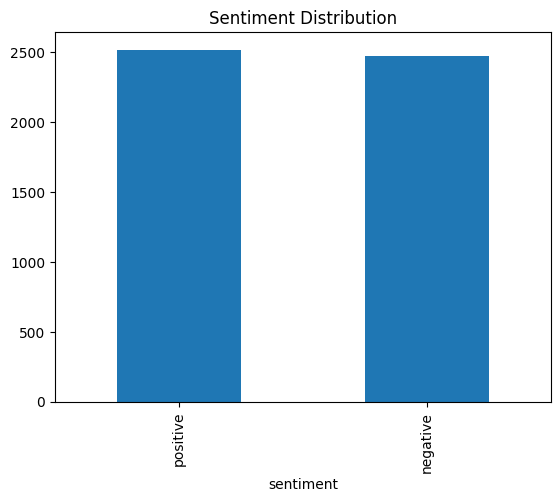

In [12]:
print(dataset['sentiment'].value_counts())
dataset['sentiment'].value_counts().plot(kind = 'bar', title = 'Sentiment Distribution')


In [13]:
dataset['review'] = dataset['review'].apply(lambda x:x.lower())

In [14]:
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'),"",raw_text)
    return cleaned_text
dataset['review'] = dataset['review'].apply(remove_tags)

In [15]:
def remove_urls(raw_text):
    cleaned_text = re.sub(r'http[s]?://\S+', '', raw_text)
    return cleaned_text

# Apply the function to your dataset
dataset['review'] = dataset['review'].apply(remove_urls)

In [16]:
def remove_urls(raw_text):
    cleaned_text = re.sub(r'http[s]?://\S+', '', raw_text)
    return cleaned_text

# Apply the function to your dataset
dataset['review'] = dataset['review'].apply(remove_urls)

In [17]:
def remove_punctuation(text):
    for c in string.punctuation:
        text = text.replace(c,'')
    return text
dataset['review'] = dataset['review'].apply(remove_punctuation)

In [18]:
import nltk
nltk.download('stopwords')
sw_list = stopwords.words('english')
dataset['review'] = dataset['review'].apply(
    lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
dataset

,review,sentiment
0,really liked summerslam due look arena curtain...,positive
1,many television shows appeal quite many differ...,positive
2,film quickly gets major chase scene ever incre...,negative
3,jane austen would definitely approve onegwynet...,positive
4,expectations somewhat high went see movie thou...,negative
...,...,...
4995,one eastwoods best movies separated westerns g...,positive
4996,blurred childhood memories kept echo cult seri...,negative
4997,love zombiemovies love amateurproductions meat...,negative
4998,chan new york gets involved attempt sabotage n...,positive


In [20]:
# Tokenize the sentence
import nltk
nltk.download('punkt')
dataset['review'] = dataset['review'].apply(lambda sentence: word_tokenize(sentence))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [21]:
dataset['review'][0]

['really',
 'liked',
 'summerslam',
 'due',
 'look',
 'arena',
 'curtains',
 'look',
 'overall',
 'interesting',
 'reason',
 'anyways',
 'could',
 'one',
 'best',
 'summerslams',
 'ever',
 'wwf',
 'didnt',
 'lex',
 'luger',
 'main',
 'event',
 'yokozuna',
 'time',
 'ok',
 'huge',
 'fat',
 'man',
 'vs',
 'strong',
 'man',
 'im',
 'glad',
 'times',
 'changed',
 'terrible',
 'main',
 'event',
 'like',
 'every',
 'match',
 'luger',
 'terrible',
 'matches',
 'card',
 'razor',
 'ramon',
 'vs',
 'ted',
 'dibiase',
 'steiner',
 'brothers',
 'vs',
 'heavenly',
 'bodies',
 'shawn',
 'michaels',
 'vs',
 'curt',
 'hening',
 'event',
 'shawn',
 'named',
 'big',
 'monster',
 'body',
 'guard',
 'diesel',
 'irs',
 'vs',
 '123',
 'kid',
 'bret',
 'hart',
 'first',
 'takes',
 'doink',
 'takes',
 'jerry',
 'lawler',
 'stuff',
 'harts',
 'lawler',
 'always',
 'interesting',
 'ludvig',
 'borga',
 'destroyed',
 'marty',
 'jannetty',
 'undertaker',
 'took',
 'giant',
 'gonzalez',
 'another',
 'terrible',
 'm

In [22]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize tokens with POS tagging
def lemmatize_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)  # Perform POS tagging
    lemmatized_tokens = []
    for token, tag in tagged_tokens:
        # Convert POS tag to WordNet POS tag
        wn_tag = nltk.corpus.wordnet.NOUN
        if tag.startswith('J'):
            wn_tag = nltk.corpus.wordnet.ADJ
        elif tag.startswith('V'):
            wn_tag = nltk.corpus.wordnet.VERB
        elif tag.startswith('R'):
            wn_tag = nltk.corpus.wordnet.ADV
        # Lemmatize token with POS tag
        lemma = lemmatizer.lemmatize(token, pos=wn_tag)
        lemmatized_tokens.append(lemma)
    return lemmatized_tokens

# Apply lemmatization to your dataset column
dataset['review'] = dataset['review'].apply(lemmatize_with_pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Student\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
dataset

,review,sentiment
0,"[really, liked, summerslam, due, look, arena, ...",positive
1,"[many, television, show, appeal, quite, many, ...",positive
2,"[film, quickly, get, major, chase, scene, ever...",negative
3,"[jane, austen, would, definitely, approve, one...",positive
4,"[expectation, somewhat, high, go, see, movie, ...",negative
...,...,...
4995,"[one, eastwoods, best, movie, separate, wester...",positive
4996,"[blur, childhood, memory, keep, echo, cult, se...",negative
4997,"[love, zombiemovies, love, amateurproductions,...",negative
4998,"[chan, new, york, get, involve, attempt, sabot...",positive


In [24]:
def join(tokens):
    return ' '.join(token for token in tokens)

dataset['review'] = dataset['review'].apply(join)

In [25]:
dataset

,review,sentiment
0,really liked summerslam due look arena curtain...,positive
1,many television show appeal quite many differe...,positive
2,film quickly get major chase scene ever increa...,negative
3,jane austen would definitely approve onegwynet...,positive
4,expectation somewhat high go see movie think s...,negative
...,...,...
4995,one eastwoods best movie separate western good...,positive
4996,blur childhood memory keep echo cult serie bel...,negative
4997,love zombiemovies love amateurproductions meat...,negative
4998,chan new york get involve attempt sabotage new...,positive


In [26]:
# Defining feature and labels
train, test = train_test_split(dataset, test_size = 0.2, shuffle = True) # Train Split 80-20
tfidfvect = TfidfVectorizer(analyzer = "word", ngram_range = (1,2), min_df = 10, max_features = 5000)

x_train_tfidf = tfidfvect.fit_transform(train['review']).toarray()
x_test_tfidf = tfidfvect.transform(test['review']).toarray()

y_train = train['sentiment']
y_test = test['sentiment']

In [27]:
x_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(3994, 5000))

In [28]:
y_train

3672    positive
2104    negative
2896    positive
2490    positive
76      negative
          ...   
3647    negative
1686    positive
3142    negative
899     negative
1416    positive
Name: sentiment, Length: 3994, dtype: object

In [29]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred_1 = mnb.predict(x_test_tfidf)
print('F1 Score: ', f1_score(y_test, y_pred_1, average = 'weighted'))
print('Classification Report: \n', classification_report(y_test, y_pred_1))

F1 Score:  0.8308522266586462
Classification Report: 
               precision    recall  f1-score   support

    negative       0.82      0.83      0.82       477
    positive       0.84      0.84      0.84       522

    accuracy                           0.83       999
   macro avg       0.83      0.83      0.83       999
weighted avg       0.83      0.83      0.83       999



In [30]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train_tfidf, y_train)
y_pred_2 = lr.predict(x_test_tfidf)
print('F1 Score: ', f1_score(y_test, y_pred_2, average = 'weighted'))
print('Classification Report: \n', classification_report(y_test, y_pred_2))

F1 Score:  0.8545990863036158
Classification Report: 
               precision    recall  f1-score   support

    negative       0.87      0.82      0.84       477
    positive       0.84      0.89      0.86       522

    accuracy                           0.85       999
   macro avg       0.86      0.85      0.85       999
weighted avg       0.86      0.85      0.85       999



In [31]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_tfidf, y_train)
y_pred_3 = rf.predict(x_test_tfidf)
print('F1 Score: ', f1_score(y_test, y_pred_3, average = 'weighted'))
print('Classification Report: \n', classification_report(y_test, y_pred_3))

F1 Score:  0.823852823435287
Classification Report: 
               precision    recall  f1-score   support

    negative       0.81      0.82      0.82       477
    positive       0.83      0.83      0.83       522

    accuracy                           0.82       999
   macro avg       0.82      0.82      0.82       999
weighted avg       0.82      0.82      0.82       999



In [32]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [33]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(mnb, x_train_tfidf, y_train, cv = skf)

# CV Results
print ("CV Results of MNB: ", cv_results.mean())

CV Results of MNB:  0.8402627344330789


In [34]:
from numpy import arange
param_grid = {
    'penalty': ["l1", "l2", "elasticnet"],
    'solver': ['saga', 'liblinear', 'lbfgs'],
    'class_weight': ['balanced']
}

In [35]:
grid_rf = GridSearchCV(lr, param_grid, scoring = 'f1_weighted', cv = skf)
grid_rf.fit(x_train_tfidf, y_train)
print("Best Parameters of LR: ", grid_rf.best_params_)
print("Best F1 Score of LR: ", grid_rf.best_score_)

c:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
20 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Student

Best Parameters of LR:  {'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}
Best F1 Score of LR:  0.8454001142199316


In [36]:
from numpy import arange
param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': arange(3, 5, 1),
    'class_weight': ['balanced']
}

In [37]:
grid_rf = GridSearchCV(rf, param_grid, scoring = 'f1_weighted', cv = skf)
grid_rf.fit(x_train_tfidf, y_train)
print("Best Parameters of RF: ", grid_rf.best_params_)
print("Best F1 Score of RF: ", grid_rf.best_score_)

Best Parameters of RF:  {'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': np.int64(4)}
Best F1 Score of RF:  0.800491790604893


ML-workshope-01